## Import Necessary Libraries 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight') 

warnings.filterwarnings('ignore')   


Load Datasets

In [63]:

deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [64]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [65]:
matches.head()  

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [66]:
deliveries.shape

(260920, 17)

In [67]:
matches.shape

(1095, 20)

In [68]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [69]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [70]:
matches['team1'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Royal Challengers Bangalore
1                   Kings XI Punjab
2                  Delhi Daredevils
3                    Mumbai Indians
4             Kolkata Knight Riders
                   ...             
1090                   Punjab Kings
1091            Sunrisers Hyderabad
1092    Royal Challengers Bengaluru
1093            Sunrisers Hyderabad
1094            Sunrisers Hyderabad
Name: team1, Length: 1095, dtype: object>

In [71]:
matches['team2'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Kolkata Knight Riders
1               Chennai Super Kings
2                  Rajasthan Royals
3       Royal Challengers Bangalore
4                   Deccan Chargers
                   ...             
1090            Sunrisers Hyderabad
1091          Kolkata Knight Riders
1092               Rajasthan Royals
1093               Rajasthan Royals
1094          Kolkata Knight Riders
Name: team2, Length: 1095, dtype: object>

In [72]:
deliveries['batting_team'].value_counts()

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

### Data Cleaning

In [73]:
matches['team1'].replace({'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Royal Challengers Bangalore': 'Royal Challengers Bengaluru','Deccan Chargers':'Sunrisers Hyderabad','Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)
matches['team2'].replace({'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Royal Challengers Bangalore': 'Royal Challengers Bengaluru','Deccan Chargers':'Sunrisers Hyderabad','Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)
matches['winner'].replace({'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Royal Challengers Bangalore': 'Royal Challengers Bengaluru','Deccan Chargers':'Sunrisers Hyderabad','Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)    
matches['toss_winner'].replace({'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Royal Challengers Bangalore': 'Royal Challengers Bengaluru','Deccan Chargers':'Sunrisers Hyderabad','Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)   
matches['player_of_match'].replace({'KD Karthik':'Dinesh Karthik','S Dhawan' :'Shikhar Dhawan','RG Sharma':'Rohit Sharma','SK Raina':'Suresh Raina','V Kohli':'Virat Kohli','DA Warner':'David Warner','JJ Bumrah':'Jaspreet Bumrah','SL Malinga':'L Malinga','SP Narine':'Sunil Narine','SV Samson':'S Samson'},inplace=True)


deliveries['batting_team'].replace({'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Royal Challengers Bangalore': 'Royal Challengers Bengaluru','Deccan Chargers':'Sunrisers Hyderabad','Rising Pune Supergiant':'Rising Pune Supergiants','SP Narine':'Sunil Narine','SV Samson':'S Samson'},inplace=True)
deliveries['bowling_team'].replace({'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Royal Challengers Bangalore': 'Royal Challengers Bengaluru','Deccan Chargers':'Sunrisers Hyderabad','Rising Pune Supergiant':'Rising Pune Supergiants','SP Narine':'Sunil Narine','SV Samson':'S Samson'},inplace=True)
deliveries['batter'].replace({'KD Karthik':'Dinesh Karthik','S Dhawan' :'Shikhar Dhawan','RG Sharma':'Rohit Sharma','SK Raina':'Suresh Raina','V Kohli':'Virat Kohli','DA Warner':'David Warner','JJ Bumrah':'Jaspreet Bumrah','SL Malinga':'L Malinga','SP Narine':'Sunil Narine','SV Samson':'S Samson'},inplace=True)
deliveries['bowler'].replace({'KD Karthik':'Dinesh Karthik','S Dhawan' :'Shikhar Dhawan','RG Sharma':'Rohit Sharma','SK Raina':'Suresh Raina','V Kohli':'Virat Kohli','DA Warner':'David Warner','JJ Bumrah':'Jaspreet Bumrah','SL Malinga':'L Malinga','SP Narine':'Sunil Narine','SV Samson':'S Samson'},inplace=True) 
deliveries['fielder'].replace({'KD Karthik':'Dinesh Karthik','S Dhawan' :'Shikhar Dhawan','RG Sharma':'Rohit Sharma','SK Raina':'Suresh Raina','V Kohli':'Virat Kohli','DA Warner':'David Warner','JJ Bumrah':'Jaspreet Bumrah','SL Malinga':'L Malinga','SP Narine':'Sunil Narine','SV Samson':'S Samson'},inplace=True) 

In [74]:
matches.isna().sum()    

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [75]:
deliveries.isna().sum() 

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [76]:
matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [77]:
matches['city'].fillna('Unknown',inplace=True)
matches['winner'].fillna('No Result',inplace=True)
matches['result_margin'].fillna(0,inplace=True)
matches['player_of_match'].fillna('No Result',inplace=True) 
matches['target_runs'].fillna(0,inplace=True)
matches['target_overs'].fillna(0,inplace=True)
matches['method'].fillna('Non D/L',inplace=True) 

In [78]:
matches.duplicated().sum()  

np.int64(0)

In [79]:
deliveries.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis


1. Success Rate of Teams

In [80]:
success_ratio = matches.groupby('winner').count()['id']/matches.groupby('team1').count()['id'] 
success_ratio_desc = success_ratio.sort_values(ascending=False) 
success_ratio_desc

Gujarat Titans                 1.333333
Mumbai Indians                 1.170732
Rajasthan Royals               1.108911
Kolkata Knight Riders          1.082645
Chennai Super Kings            1.078125
Rising Pune Supergiants        1.071429
Lucknow Super Giants           1.043478
Sunrisers Hyderabad            0.936000
Delhi Capitals                 0.912698
Punjab Kings                   0.910569
Kochi Tuskers Kerala           0.857143
Royal Challengers Bengaluru    0.854167
Gujarat Lions                  0.812500
Pune Warriors                  0.521739
No Result                           NaN
Name: id, dtype: float64

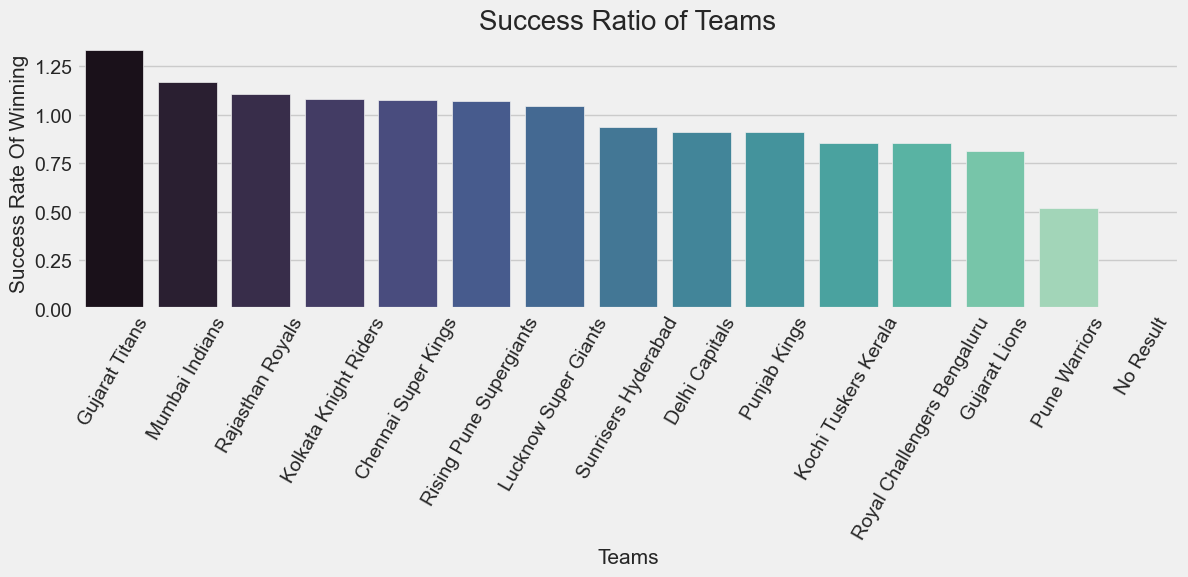

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x=success_ratio_desc.index,y=success_ratio_desc.values,palette='mako')
plt.title('Success Ratio of Teams',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Success Rate Of Winning',fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [82]:
matches.groupby('team1').count()['id'] + matches.groupby('team2').count()['id']

team1
Chennai Super Kings            238
Delhi Capitals                 252
Gujarat Lions                   30
Gujarat Titans                  45
Kochi Tuskers Kerala            14
Kolkata Knight Riders          251
Lucknow Super Giants            44
Mumbai Indians                 261
Pune Warriors                   46
Punjab Kings                   246
Rajasthan Royals               221
Rising Pune Supergiants         30
Royal Challengers Bengaluru    255
Sunrisers Hyderabad            257
Name: id, dtype: int64

2. Most Titles Won

In [83]:
winner_counts = matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()
winner_counts 

winner
Mumbai Indians           5
Chennai Super Kings      5
Kolkata Knight Riders    3
Sunrisers Hyderabad      2
Rajasthan Royals         1
Gujarat Titans           1
Name: count, dtype: int64

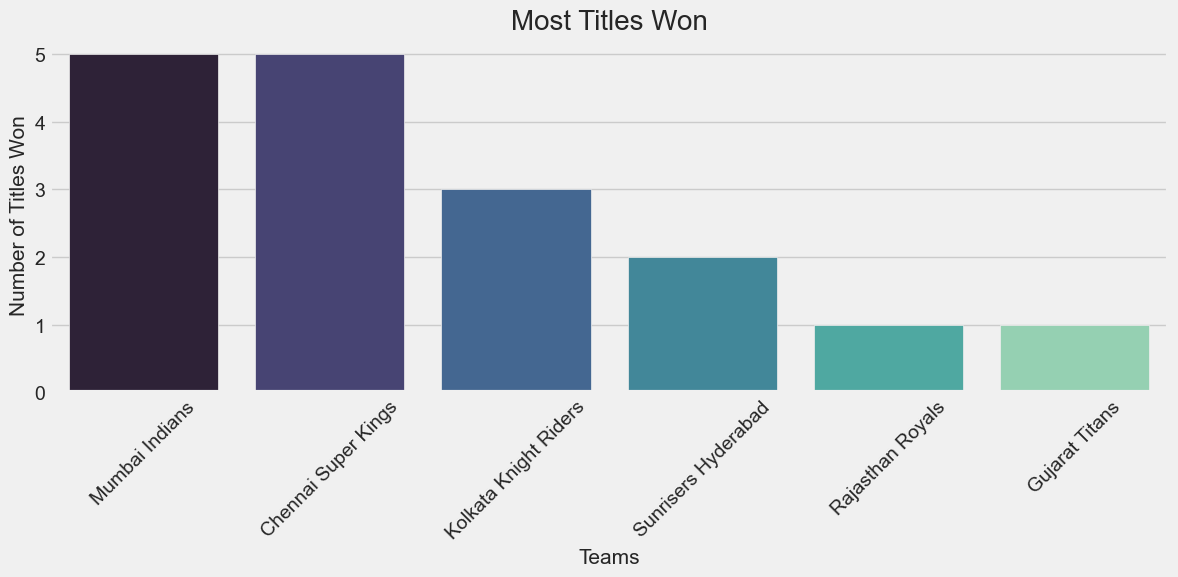

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(x=winner_counts.index,y=winner_counts.values,palette='mako')
plt.title('Most Titles Won',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Number of Titles Won',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

3. Top 10 Players With Most Runs

In [85]:
batting_total = deliveries.groupby('batter').sum()['batsman_runs'].sort_values(ascending=False)
top_batsmen = batting_total.head(10)
top_batsmen

batter
Virat Kohli       8014
Shikhar Dhawan    6769
Rohit Sharma      6630
David Warner      6567
Suresh Raina      5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
Dinesh Karthik    4843
Name: batsman_runs, dtype: int64

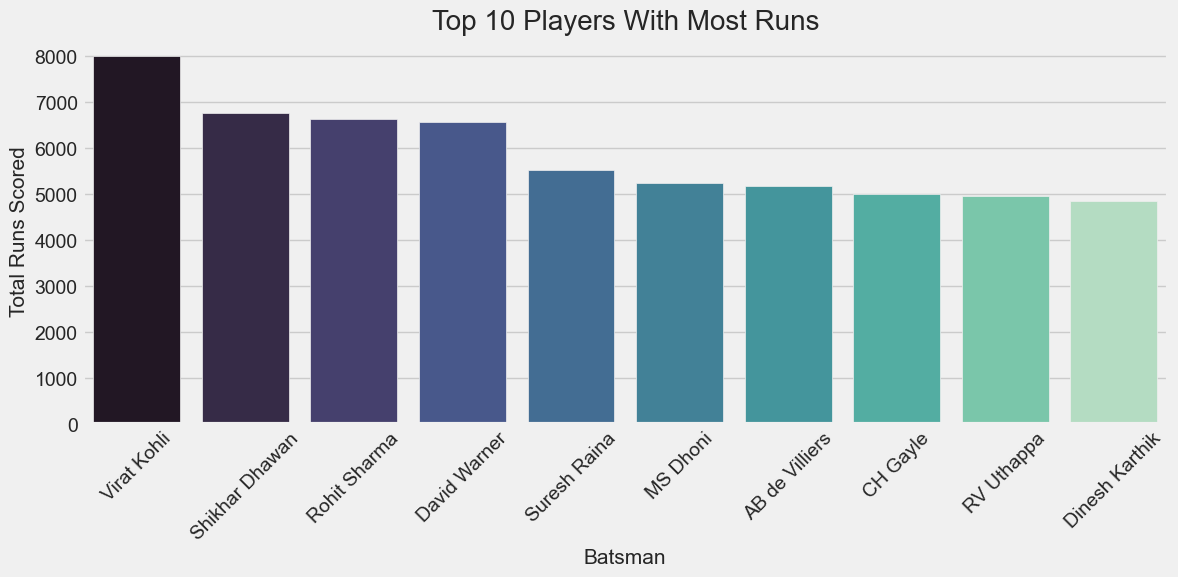

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(x='batter',y='batsman_runs',data=top_batsmen.reset_index(),palette='mako')
plt.title('Top 10 Players With Most Runs',fontsize=20)
plt.xlabel('Batsman',fontsize=15)   
plt.ylabel('Total Runs Scored',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Top 10 Best Performances in a Match

In [87]:
batting_innings = deliveries.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index(name='Innings Runs')
top_batsmen_scores = batting_innings.sort_values(by='Innings Runs',ascending=False).head(10)
top_batsmen_scores

,match_id,batter,Innings Runs
5302,598027,CH Gayle,175
2,335982,BB McCullum,158
14108,1304112,Q de Kock,140
7528,829795,AB de Villiers,133
11583,1216510,KL Rahul,132
15383,1370352,Shubman Gill,129
8359,980987,AB de Villiers,129
4687,548372,CH Gayle,128
10149,1136602,RR Pant,128
2237,419137,M Vijay,127


In [88]:
batsman_ball_faced = deliveries.groupby(['match_id','batter'])['batsman_runs'].count().reset_index(name='Balls Faced')
batsman_ball_faced

,match_id,batter,Balls Faced
0,335982,AA Noffke,12
1,335982,B Akhil,2
2,335982,BB McCullum,77
3,335982,CL White,10
4,335982,DJ Hussey,12
...,...,...,...
16510,1426312,SS Iyer,3
16511,1426312,Shahbaz Ahmed,7
16512,1426312,Sunil Narine,2
16513,1426312,TM Head,1


In [89]:
batsman_performance = pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',on=['match_id','batter'])
batsman_performance['Strike Rate'] = np.round(batsman_performance['Innings Runs']*100/batsman_performance['Balls Faced'],2)
batsman_performance

,match_id,batter,Innings Runs,Balls Faced,Strike Rate
0,598027,CH Gayle,175,69,253.62
1,335982,BB McCullum,158,77,205.19
2,1304112,Q de Kock,140,71,197.18
3,829795,AB de Villiers,133,61,218.03
4,1216510,KL Rahul,132,70,188.57
5,1370352,Shubman Gill,129,63,204.76
6,980987,AB de Villiers,129,53,243.40
7,548372,CH Gayle,128,62,206.45
8,1136602,RR Pant,128,64,200.00
9,419137,M Vijay,127,57,222.81


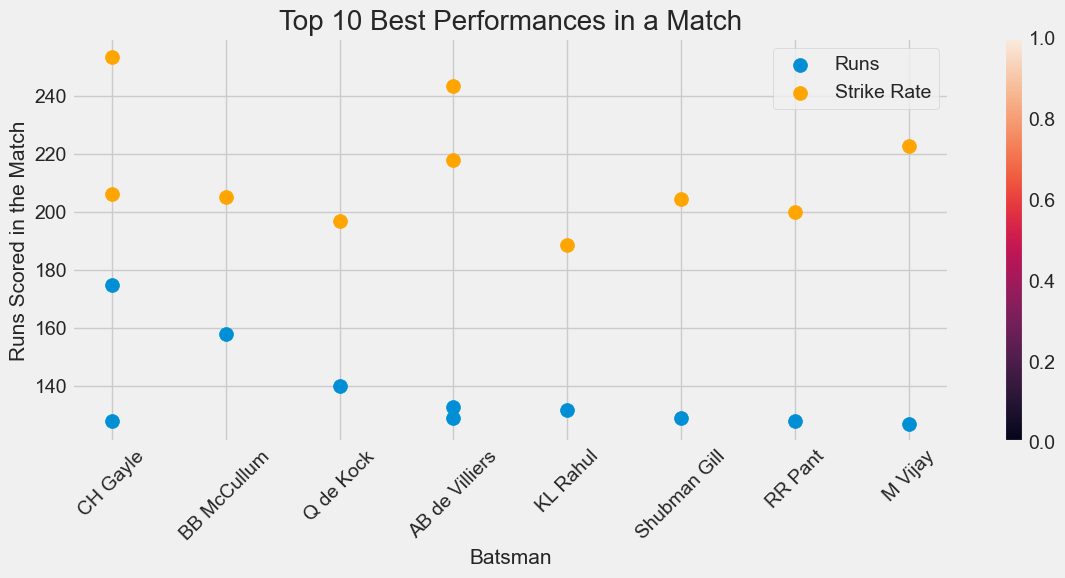

In [90]:
plt.figure(figsize=(12,6))
plt.scatter(batsman_performance['batter'],batsman_performance['Innings Runs'],label='Runs',s=100,marker='o')
plt.scatter(batsman_performance['batter'],batsman_performance['Strike Rate'],label='Strike Rate',s=100,marker='o',color='orange')
plt.colorbar()
plt.title('Top 10 Best Performances in a Match',fontsize=20)    
plt.xlabel('Batsman',fontsize=15)
plt.ylabel('Runs Scored in the Match',fontsize=15)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()

5. Top 10 Bowlers in IPL

In [91]:
bowling_wickets = deliveries[deliveries['dismissal_kind'] != 'run out']
top_bowlers = bowling_wickets.groupby('bowler').count()['dismissal_kind'].reset_index(name='Wickets Taken').sort_values(by='Wickets Taken',ascending=False).head(10)
top_bowlers

,bowler,Wickets Taken
524,YS Chahal,205
349,PP Chawla,192
118,DJ Bravo,183
71,B Kumar,181
356,R Ashwin,181
473,Sunil Narine,180
8,A Mishra,174
243,L Malinga,170
206,Jaspreet Bumrah,168
374,RA Jadeja,160


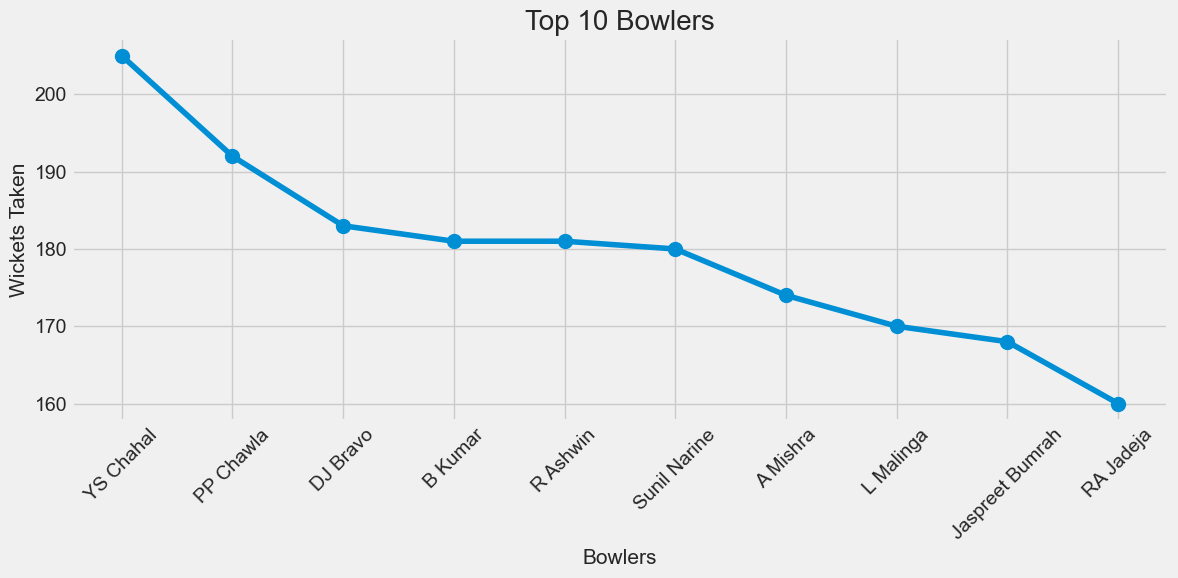

In [92]:
plt.figure(figsize=(12,6))
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets Taken'],marker='o',markersize=10)
plt.title('Top 10 Bowlers',fontsize=20)
plt.xlabel('Bowlers',fontsize=15)
plt.ylabel('Wickets Taken',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Top 10 Bowling Performances

In [93]:
top_match_bowling= bowling_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(name='Wickets Taken').sort_values(by='Wickets Taken',ascending=False).head(10)
top_match_bowling

,match_id,bowler,Wickets Taken
6608,980979,A Zampa,6
289,336005,Sohail Tanvir,6
8498,1178394,AS Joseph,6
11968,1359536,B Kumar,5
3066,548311,RA Jadeja,5
375,336013,L Balaji,5
9204,1216512,LH Ferguson,5
12104,1370352,MM Sharma,5
7083,1082609,B Kumar,5
10716,1304076,YS Chahal,5


In [94]:
match_bowler_runs = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name='Runs Conceded')
match_bowler_runs

,match_id,bowler,Runs Conceded
0,335982,AA Noffke,41
1,335982,AB Agarkar,25
2,335982,AB Dinda,9
3,335982,CL White,24
4,335982,I Sharma,13
...,...,...,...
12973,1426312,PJ Cummins,18
12974,1426312,Shahbaz Ahmed,28
12975,1426312,Sunil Narine,20
12976,1426312,T Natarajan,29


In [95]:
match_bowler_performance = pd.merge(match_bowler_runs,top_match_bowling,how='inner',on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket'] = np.round(match_bowler_performance['Runs Conceded'] / match_bowler_performance['Wickets Taken'], 0)
match_bowler_performance

,match_id,bowler,Runs Conceded,Wickets Taken,Runs per Wicket
0,336005,Sohail Tanvir,15,6,2.0
1,336013,L Balaji,25,5,5.0
2,548311,RA Jadeja,16,5,3.0
3,980979,A Zampa,19,6,3.0
4,1082609,B Kumar,20,5,4.0
5,1178394,AS Joseph,14,6,2.0
6,1216512,LH Ferguson,18,5,4.0
7,1304076,YS Chahal,40,5,8.0
8,1359536,B Kumar,31,5,6.0
9,1370352,MM Sharma,11,5,2.0


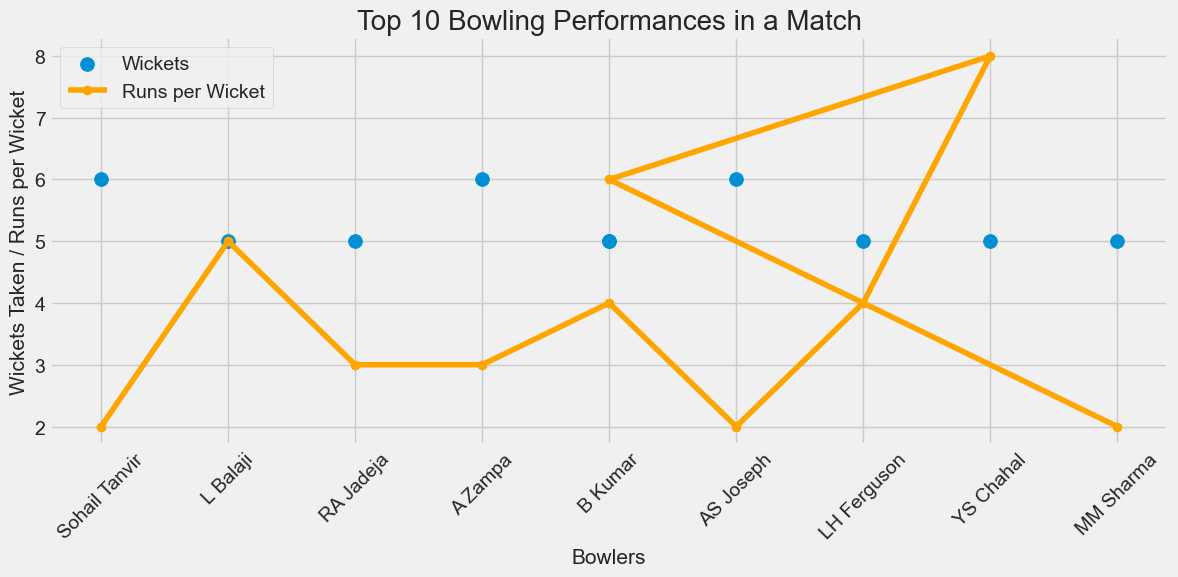

In [96]:
plt.figure(figsize=(12,6))
plt.scatter(match_bowler_performance['bowler'],match_bowler_performance['Wickets Taken'],label='Wickets',s=100) 
plt.plot(match_bowler_performance['bowler'],match_bowler_performance['Runs per Wicket'],label='Runs per Wicket',marker='o',color='orange')
plt.title('Top 10 Bowling Performances in a Match',fontsize=20)
plt.xlabel('Bowlers',fontsize=15)
plt.ylabel('Wickets Taken / Runs per Wicket',fontsize=15)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

7. Top 10 Cities by Number of Matches

In [97]:
top_cities = matches['city'].value_counts().reset_index(name='Number of Matches').head(10)
top_cities

,city,Number of Matches
0,Mumbai,173
1,Kolkata,93
2,Delhi,90
3,Chennai,85
4,Hyderabad,77
5,Bangalore,65
6,Chandigarh,61
7,Jaipur,57
8,Pune,51
9,Unknown,51


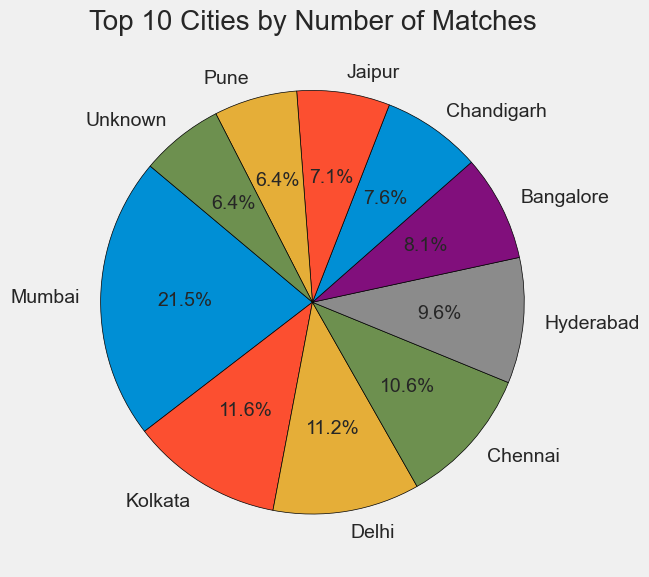

In [98]:
plt.figure(figsize=(12,6))
plt.pie(top_cities['Number of Matches'],labels=top_cities['city'],autopct='%1.1f%%',startangle=140,wedgeprops={'edgecolor':'black'})
plt.title('Top 10 Cities by Number of Matches',fontsize=20)
plt.tight_layout()
plt.show()

8. Types of Dismisals

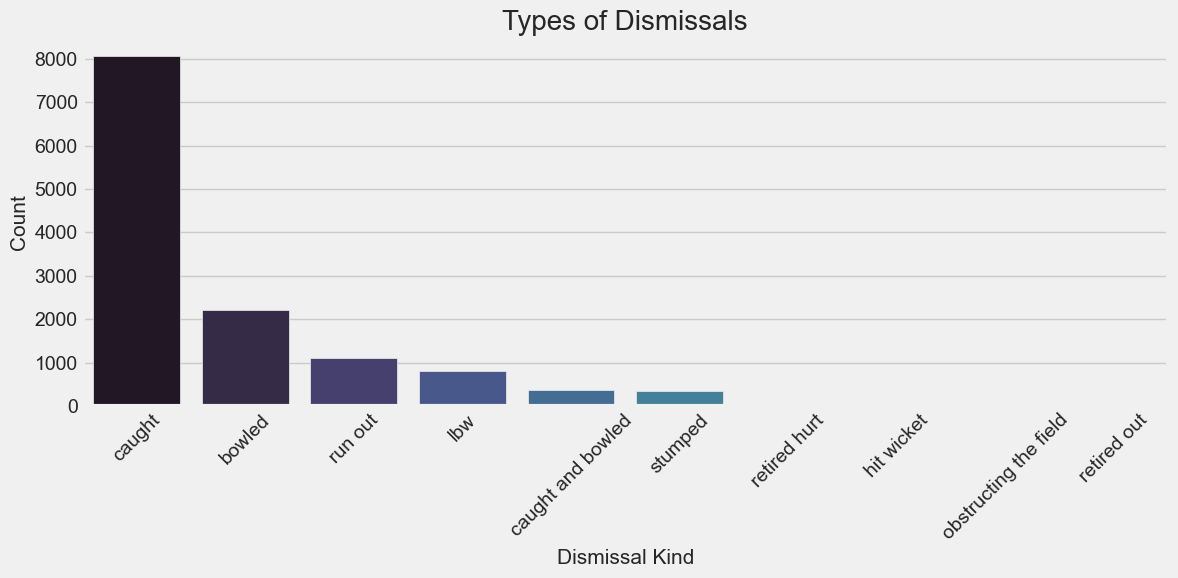

In [99]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind',data=deliveries,order=deliveries['dismissal_kind'].value_counts().index,palette='mako')
plt.title('Types of Dismissals',fontsize=20)
plt.xlabel('Dismissal Kind',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. Top 10 Best Fielders

In [100]:
top_fielders = deliveries['fielder'].value_counts().head(10)
top_fielders

fielder
MS Dhoni          220
Dinesh Karthik    199
AB de Villiers    141
RV Uthappa        133
Virat Kohli       131
WP Saha           131
Suresh Raina      119
RA Jadeja         116
S Samson          115
Rohit Sharma      111
Name: count, dtype: int64

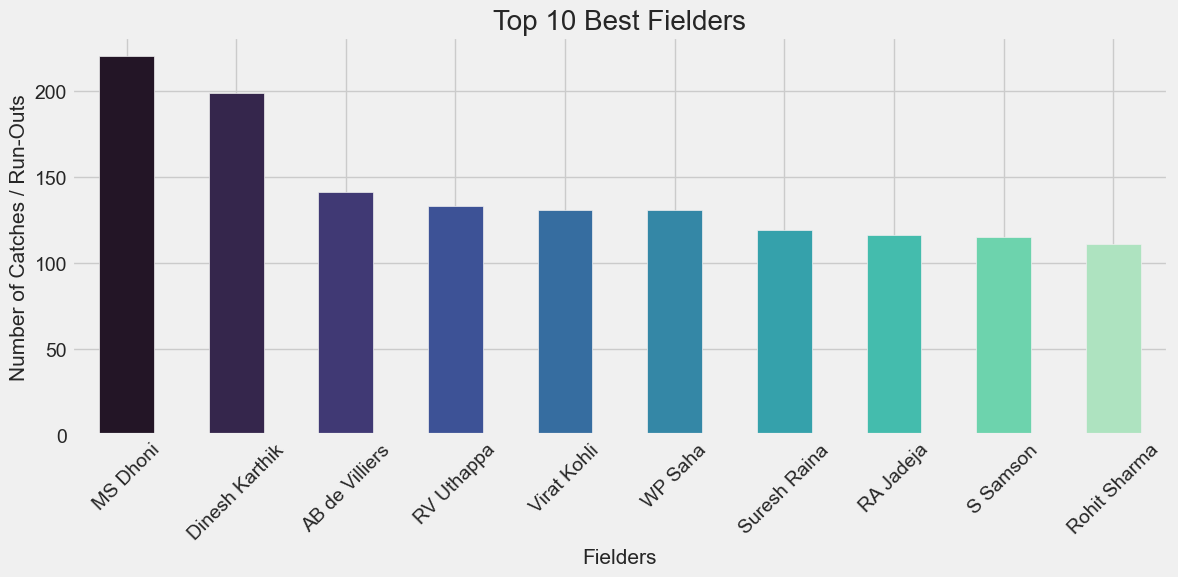

In [101]:
top_fielders.plot(kind='bar',figsize=(12,6),color=sns.color_palette('mako',10))
plt.title('Top 10 Best Fielders',fontsize=20)
plt.xlabel('Fielders',fontsize=15)
plt.ylabel('Number of Catches / Run-Outs',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10. Analysis Over by Over

In [102]:
over_summary = deliveries.groupby('over')[['total_runs','is_wicket','extra_runs','batsman_runs']].sum()
over_summary

,total_runs,is_wicket,extra_runs,batsman_runs
over,,,,
0,13651,463,1257,12394
1,16163,503,1266,14897
2,17895,533,961,16934
3,18415,548,905,17510
4,18565,576,812,17753
5,18528,540,887,17641
6,14839,444,804,14035
7,15981,472,721,15260
8,16639,537,724,15915


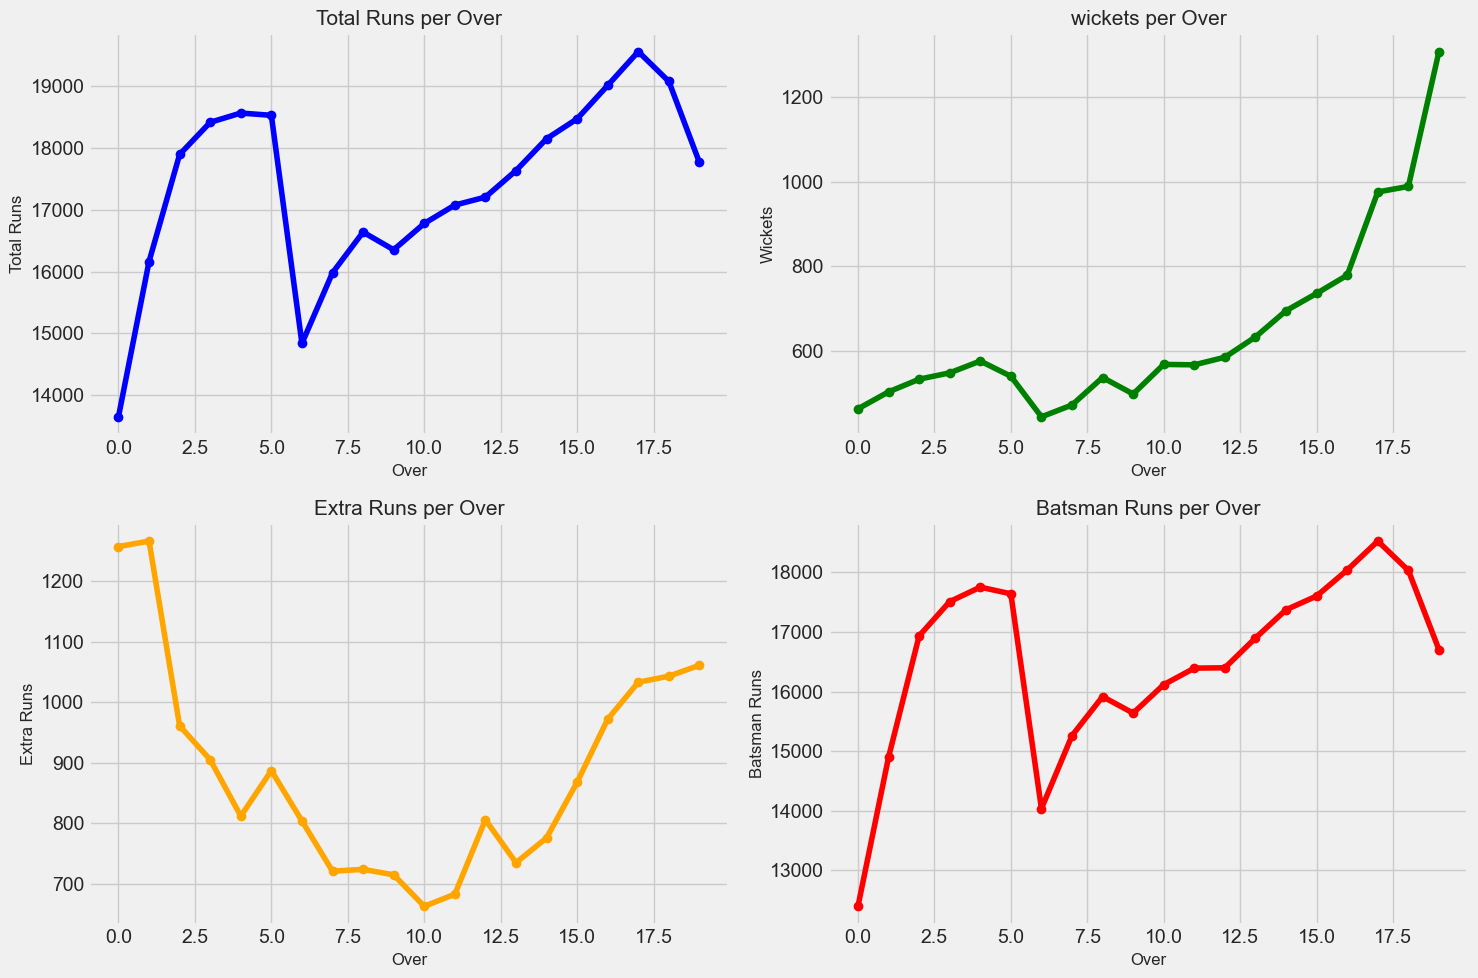

In [103]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

axes[0,0].plot(over_summary.index,over_summary['total_runs'],marker='o',color='blue')
axes[0,0].set_title('Total Runs per Over',fontsize=15)
axes[0,0].set_xlabel('Over',fontsize=12)    
axes[0,0].set_ylabel('Total Runs',fontsize=12)

axes[0,1].plot(over_summary.index,over_summary['is_wicket'],marker='o',color='green')
axes[0,1].set_title('wickets per Over',fontsize=15)
axes[0,1].set_xlabel('Over',fontsize=12)
axes[0,1].set_ylabel('Wickets',fontsize=12)

axes[1,0].plot(over_summary.index,over_summary['extra_runs'],marker='o',color='orange')
axes[1,0].set_title('Extra Runs per Over',fontsize=15)
axes[1,0].set_xlabel('Over',fontsize=12)
axes[1,0].set_ylabel('Extra Runs',fontsize=12)

axes[1,1].plot(over_summary.index,over_summary['batsman_runs'],marker='o',color='red')
axes[1,1].set_title('Batsman Runs per Over',fontsize=15)
axes[1,1].set_xlabel('Over',fontsize=12)
axes[1,1].set_ylabel('Batsman Runs',fontsize=12)

plt.tight_layout()
plt.show()

11. Toss Decision

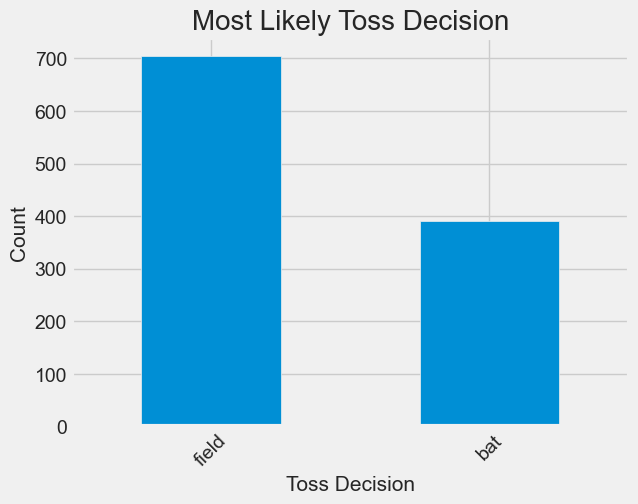

In [104]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title('Most Likely Toss Decision',fontsize=20)
plt.xlabel('Toss Decision',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Count',fontsize=15) 
plt.show()

12. Season-Wise Team Performance

In [105]:
season_team_stats = matches.groupby(['season', 'winner']).size().reset_index(name='Wins')
season_team_played = pd.concat([
    matches.groupby(['season', 'team1']).size().reset_index(name='Played'),
    matches.groupby(['season', 'team2']).size().reset_index(name='Played')
]).groupby(['season', 'team1']).sum().reset_index().rename(columns={'team1': 'Team'})

season_team_stats = season_team_stats.rename(columns={'winner': 'Team'})
season_performance = pd.merge(season_team_played, season_team_stats, how='left', on=['season', 'Team']).fillna(0)
season_performance['Win Ratio'] = (season_performance['Wins'] / season_performance['Played']).round(2)
season_performance.sort_values(['season', 'Win Ratio'], ascending=[True, False])

,season,Team,Played,team2,Wins,Win Ratio
5,2007/08,Rajasthan Royals,7,0,13,1.86
4,2007/08,Punjab Kings,7,0,10,1.43
0,2007/08,Chennai Super Kings,9,0,9,1.00
1,2007/08,Delhi Capitals,7,0,7,1.00
3,2007/08,Mumbai Indians,7,0,7,1.00
...,...,...,...,...,...,...
135,2024,Chennai Super Kings,8,0,7,0.88
139,2024,Lucknow Super Giants,8,0,7,0.88
137,2024,Gujarat Titans,6,0,5,0.83
140,2024,Mumbai Indians,5,0,4,0.80


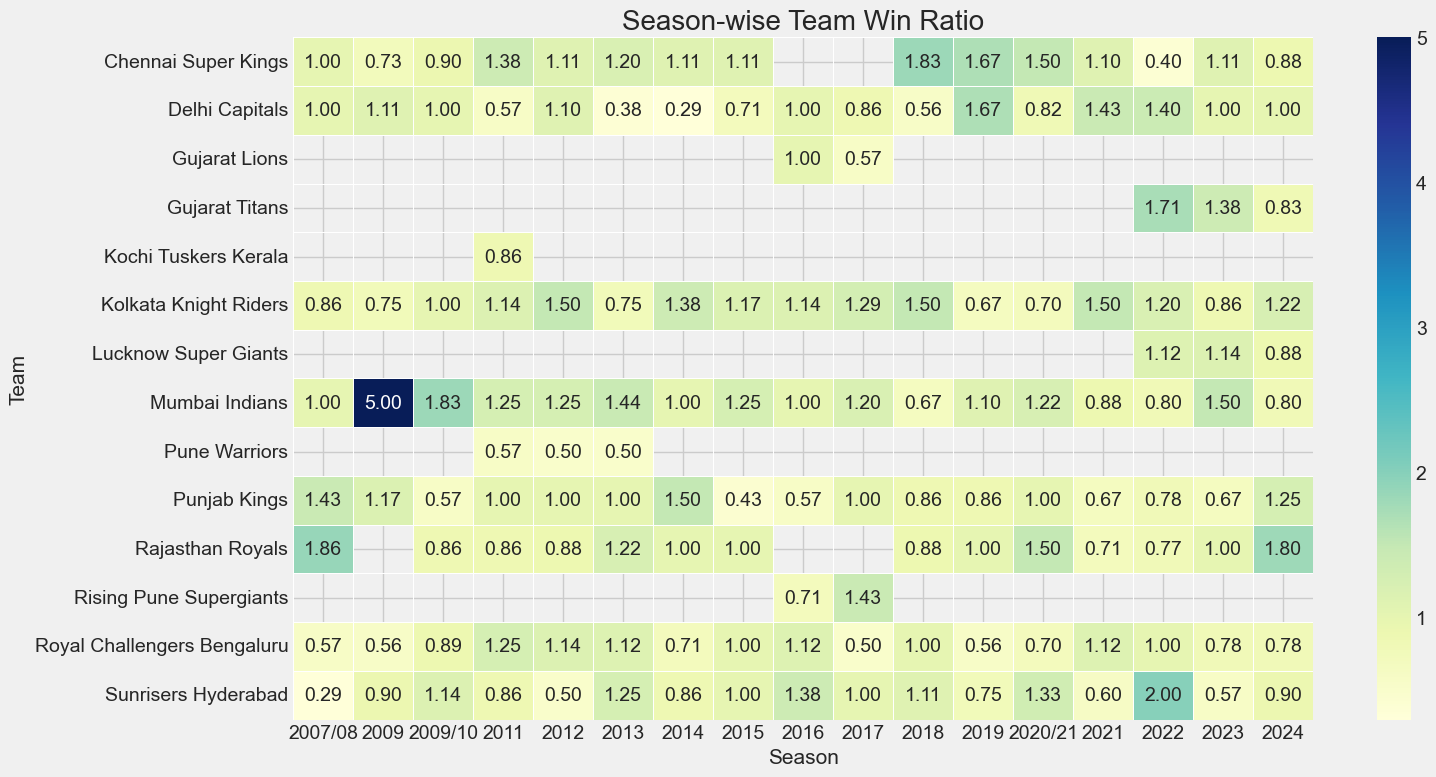

In [106]:
pivot = season_performance.pivot(index='Team', columns='season', values='Win Ratio')
plt.figure(figsize=(16,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)
plt.title('Season-wise Team Win Ratio', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Team', fontsize=15)
plt.tight_layout()
plt.show()

13. Top 10 Highest Partnerships (by Team & Inning)

In [107]:
partnerships = deliveries.groupby(['match_id', 'batting_team', 'inning'])['batsman_runs'].sum().reset_index()
highest_partnership = partnerships.sort_values('batsman_runs', ascending=False).head(10)
highest_partnership

,match_id,batting_team,inning,batsman_runs
2134,1426268,Sunrisers Hyderabad,1,272
2144,1426273,Sunrisers Hyderabad,1,261
2090,1422126,Sunrisers Hyderabad,1,258
2158,1426280,Punjab Kings,2,256
710,598027,Royal Challengers Bengaluru,1,252
2106,1422134,Kolkata Knight Riders,1,250
2159,1426281,Delhi Capitals,1,249
2133,1426268,Royal Challengers Bengaluru,2,248
2157,1426280,Kolkata Knight Riders,1,248
1131,980987,Royal Challengers Bengaluru,1,244


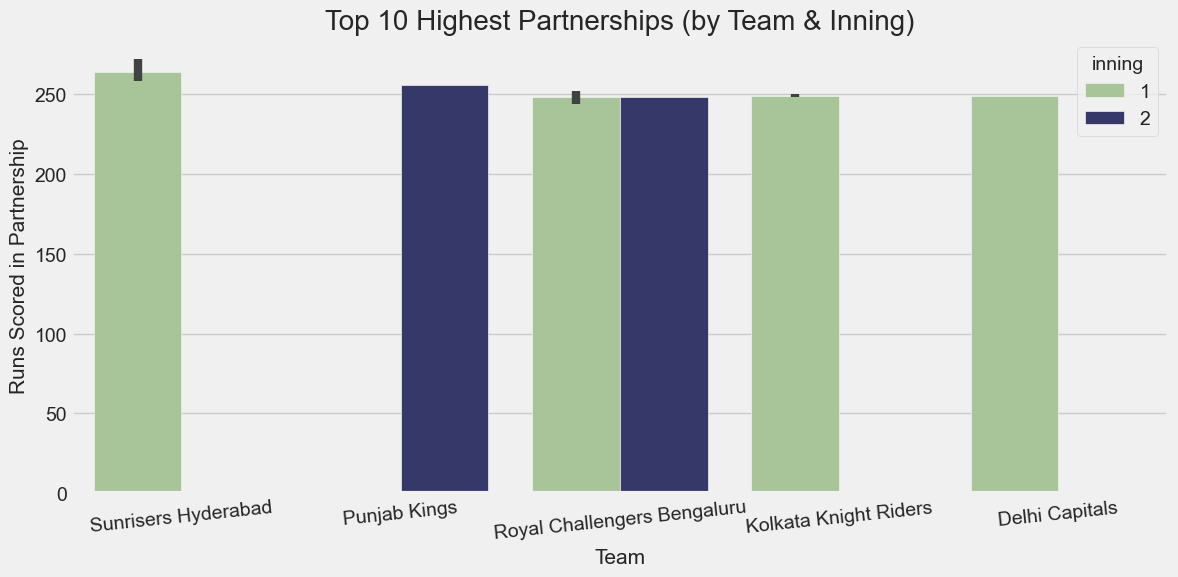

In [108]:
plt.figure(figsize=(12,6))
sns.barplot(x='batting_team', y='batsman_runs', data=highest_partnership, hue='inning',palette='crest')
plt.title('Top 10 Highest Partnerships (by Team & Inning)', fontsize=20)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Runs Scored in Partnership', fontsize=15)
plt.xticks(rotation=6)
plt.tight_layout()
plt.show()

14. Top 10 Players with Most "Player of the Match" Awards

In [109]:
top_players = matches['player_of_match'].value_counts().head(10)
print(top_players)

player_of_match
AB de Villiers    25
CH Gayle          22
Rohit Sharma      19
David Warner      18
Virat Kohli       18
MS Dhoni          17
RA Jadeja         16
YK Pathan         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


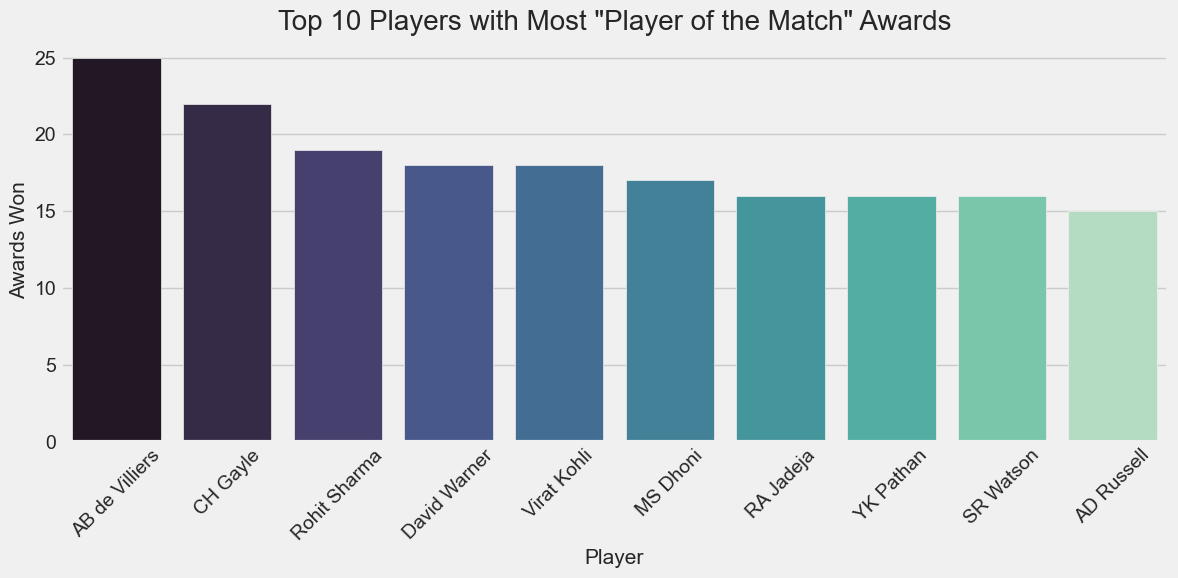

In [110]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_players.index, y=top_players.values, palette='mako')
plt.title('Top 10 Players with Most "Player of the Match" Awards', fontsize=20)
plt.xlabel('Player', fontsize=15)
plt.ylabel('Awards Won', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15. Most Matches That Went to Super Over

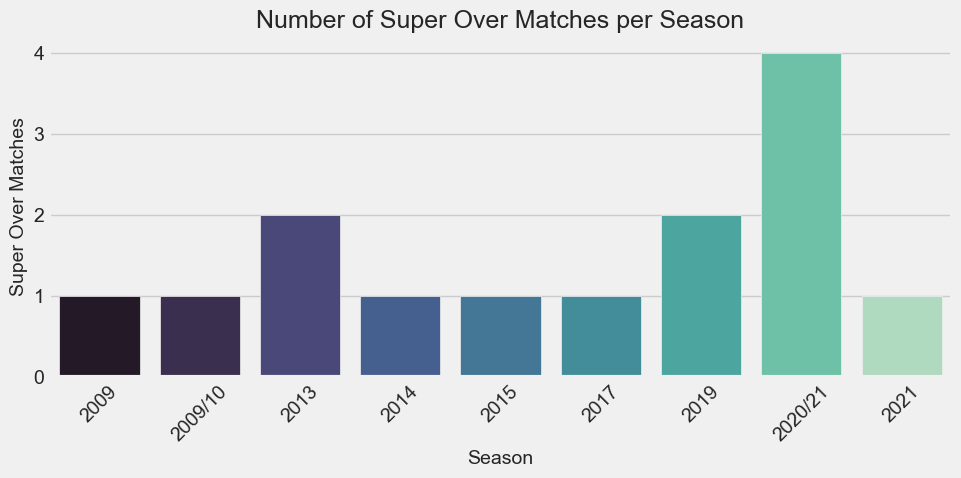

In [111]:
super_over_matches = matches[matches['super_over'] == 'Y']
super_over_season = super_over_matches['season'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=super_over_season.index, y=super_over_season.values, palette='mako')
plt.title('Number of Super Over Matches per Season', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Super Over Matches', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16. Top Teams Involved in Super Over Matches

In [112]:
teams_super_over = pd.concat([
    super_over_matches['team1'],
    super_over_matches['team2']
]).value_counts().head(10)
print(teams_super_over)

Kolkata Knight Riders          4
Sunrisers Hyderabad            4
Punjab Kings                   4
Delhi Capitals                 4
Mumbai Indians                 4
Royal Challengers Bengaluru    3
Rajasthan Royals               3
Chennai Super Kings            1
Gujarat Lions                  1
Name: count, dtype: int64


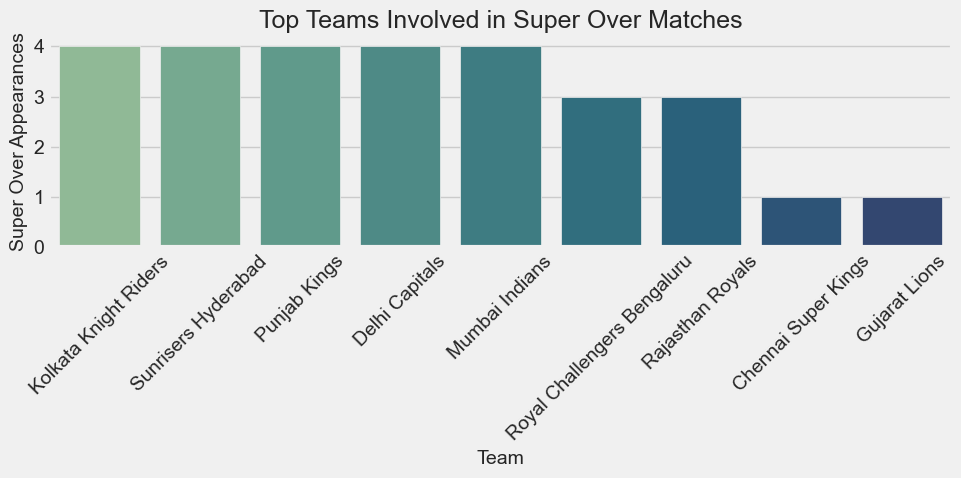

In [113]:
plt.figure(figsize=(10,5))
sns.barplot(x=teams_super_over.index, y=teams_super_over.values, palette='crest')
plt.title('Top Teams Involved in Super Over Matches', fontsize=18)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Super Over Appearances', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

17. Smallest Wnning Margins by Runs

In [114]:
close_by_runs = matches[(matches['result'] == 'runs') & (matches['result_margin'] > 0)].sort_values('result_margin').head(10)
print(close_by_runs[['season', 'team1', 'team2', 'result_margin']])

       season                        team1                        team2  \
44    2007/08               Mumbai Indians                 Punjab Kings   
1059     2024        Kolkata Knight Riders  Royal Challengers Bengaluru   
104      2009          Sunrisers Hyderabad                 Punjab Kings   
837      2021  Royal Challengers Bengaluru               Delhi Capitals   
755      2019               Mumbai Indians          Chennai Super Kings   
284      2012               Delhi Capitals             Rajasthan Royals   
734      2019  Royal Challengers Bengaluru          Chennai Super Kings   
1017     2023         Lucknow Super Giants        Kolkata Knight Riders   
290      2012                Pune Warriors               Mumbai Indians   
459      2015          Chennai Super Kings               Delhi Capitals   

      result_margin  
44              1.0  
1059            1.0  
104             1.0  
837             1.0  
755             1.0  
284             1.0  
734             1.0 

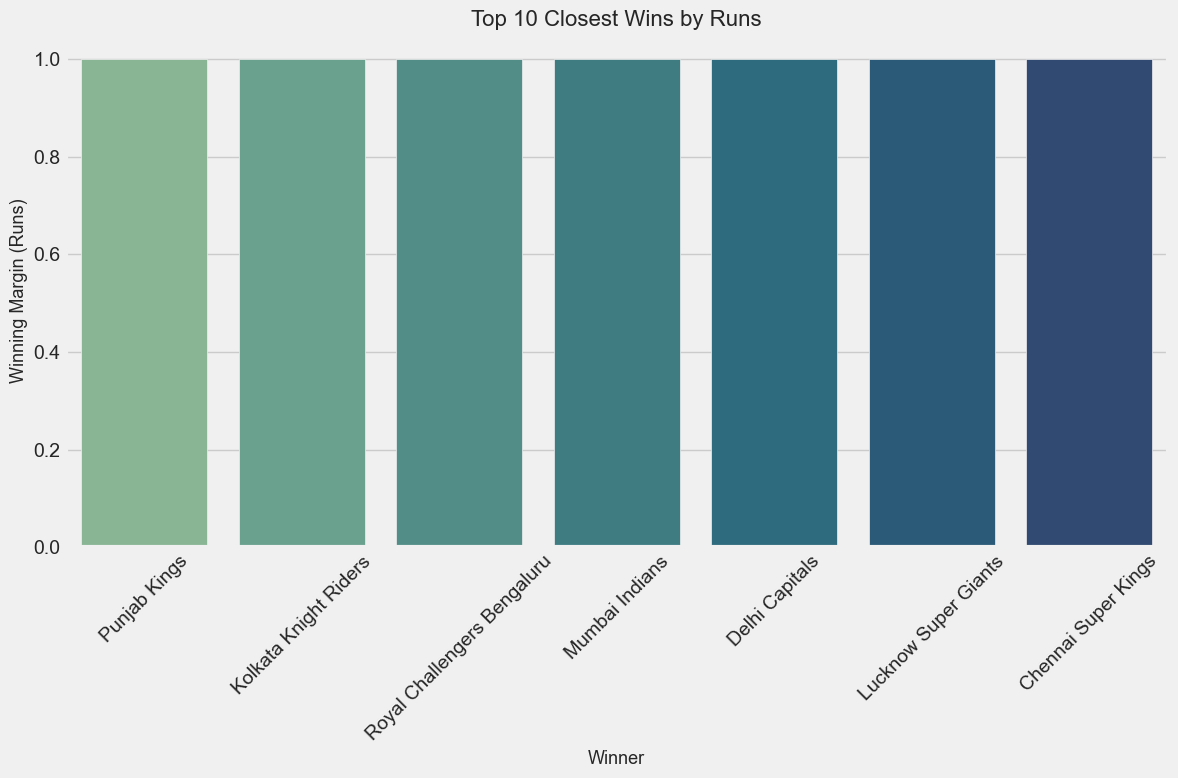

In [115]:

plt.figure(figsize=(12,8))
sns.barplot(x='winner', y='result_margin', data=close_by_runs, palette='crest')
plt.title('Top 10 Closest Wins by Runs', fontsize=16)
plt.xlabel('Winner', fontsize=13)
plt.ylabel('Winning Margin (Runs)', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

18. Smallest Winning Matches by Wickets 

In [116]:
close_by_wickets = matches[(matches['result'] == 'wickets') & (matches['result_margin'] == 1)]
print(close_by_wickets[['season', 'team1', 'team2', 'result_margin']])

    season                        team1                 team2  result_margin
500   2015        Kolkata Knight Riders          Punjab Kings            1.0
636   2018               Mumbai Indians   Chennai Super Kings            1.0
642   2018               Mumbai Indians   Sunrisers Hyderabad            1.0
964   2023  Royal Challengers Bengaluru  Lucknow Super Giants            1.0


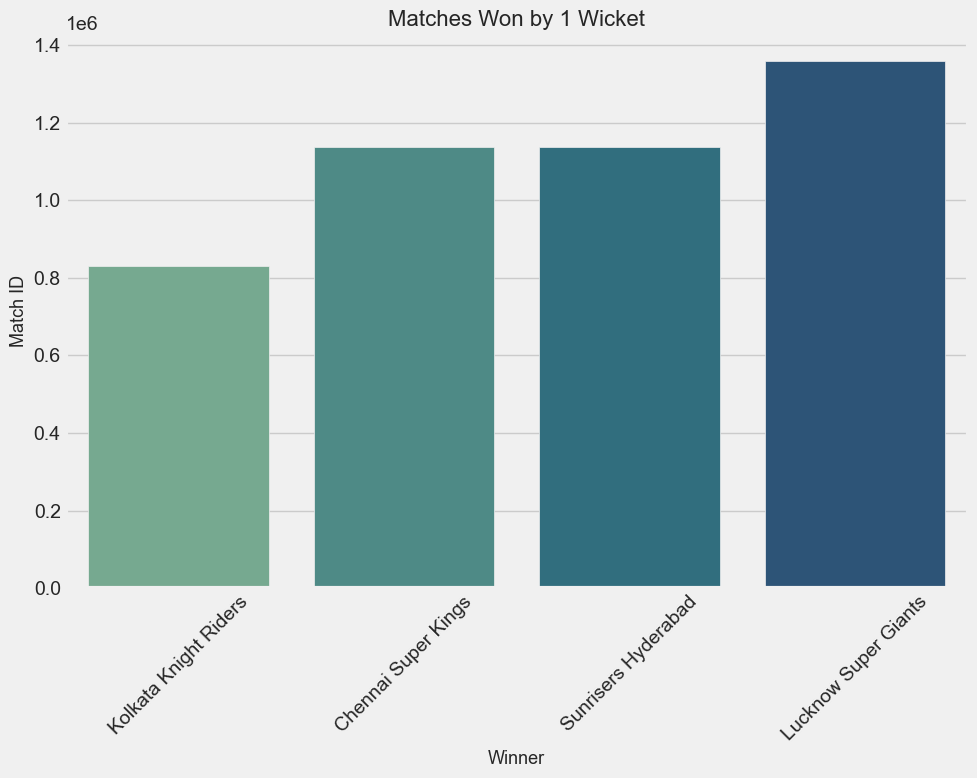

In [117]:
plt.figure(figsize=(10,8))
sns.barplot(x='winner', y='id', data=close_by_wickets, palette='crest')
plt.title('Matches Won by 1 Wicket', fontsize=16)
plt.xlabel('Winner', fontsize=13)
plt.ylabel('Match ID', fontsize=13)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()  